In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_fav = pd.read_excel(r'C:\Users\Seal\PycharmProjects\Digital office\data_favorite.xlsx')
data = pd.read_excel(r'C:\Users\Seal\PycharmProjects\Digital office\data_clean.xlsx')

#data_fav = pd.read_excel(r'C:\Users\newsl\datasets\Digital Office\data_favorite.xlsx')
#data = pd.read_excel(r'C:\Users\newsl\datasets\Digital Office\data_clean.xlsx')

In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data_fav = data_fav.drop('Unnamed: 0', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      22360 non-null  int64         
 1   event_date    22360 non-null  datetime64[ns]
 2   month         22360 non-null  int64         
 3   year          22360 non-null  int64         
 4   referrer_new  22360 non-null  object        
 5   transition    22360 non-null  object        
 6   title_new     22360 non-null  object        
 7   uid           22360 non-null  object        
 8   url_new       22360 non-null  object        
 9   fav           22360 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 1.6+ MB


In [3]:
data.head()

,event_id,event_date,month,year,referrer_new,transition,title_new,uid,url_new,fav
0,4833851,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Digital office / Офис,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
1,4833855,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Незакрепленные рабочие места,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
2,4833859,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,4 этаж,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False
3,4829519,2022-01-10,1,2022,kb.gazprom-neft.local,Confluence,Где поесть в Невской Ратуше,987b6c531103a69837ab47091f2cdf649026d540559a9d...,https://kb.gazprom-neft.local/pages/viewpage.a...,True
4,4834253,2022-01-10,1,2022,Прямой,Прямой,Концепция распределения рабочих мест для ДЦТ и...,6b9a6172668f7867234cac83adae71cffd243ba4d6a7b0...,https://kb.gazprom-neft.local/pages/viewpage.a...,False


In [4]:
data_2022 = data.query('event_date < "2023-01-01"')

### Количество сессий и пользователей: 
- Всего сессий за 2022 г. - **20868 шт**
- Количество сессий по избранным страничкам за 2022 г. - **7439 шт**
- Количество уникальных пользователей за 2022 г. - **4427 чел**
- Количество уникальных пользователей, посетивших избранные странички в 2022 г. - **2090 чел**

- В среднем сессий на 1 пользователя: **4.7 шт**
- В среднем сессий на 1 пользователя при посещении избранных страничек:  **3.6 шт**

In [5]:
print(data_2022['event_id'].nunique())
print(data_2022.query('fav == True')['event_id'].nunique())
print(data_2022['uid'].nunique())
print(data_2022.query('fav == True')['uid'].nunique())
print("{:.2}".format(data_2022['event_id'].nunique()/data_2022['uid'].nunique()))
print("{:.2}".format(data_2022.query('fav == True')['event_id'].nunique()/data_2022.query('fav == True')['uid'].nunique()))

20868
7439
4427
2090
4.7
3.6


### Пользователи, посетившие раздел один раз
- Количество пользователей, посетивших раздел только один раз: **2148 чел.**
- Доля пользователей, посетивших раздел всего один раз: **48.52%**

In [6]:
temp = data_2022.groupby('uid')['event_id'].nunique().reset_index()
print(len(temp.query('event_id == 1')))
print("{:.2%}".format(len(temp.query('event_id == 1')) / data_2022['uid'].nunique()))

2148
48.52%


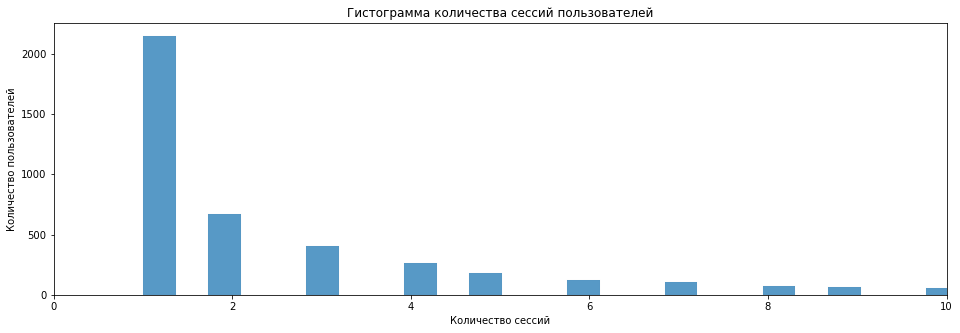

In [7]:
user_events = data_2022.groupby('uid').agg({'event_id': 'count'})

plt.figure(figsize=(16, 5))
sns.histplot(user_events['event_id'])
plt.xlim([0, 10])
plt.title("Гистограмма количества сессий пользователей")
plt.xlabel("Количество сессий")
plt.ylabel("Количество пользователей")
plt.show()

### DAU и MAU
- средний DAU за 2022 г. - **18 чел.**
- средний MAU за 2022 г. - **377 чел.**

In [8]:
print(round(data_2022.groupby('event_date').agg({'uid': 'nunique'}).mean()))
print(round(data_2022.groupby('month').agg({'uid': 'nunique'}).mean()))

uid    18.0
dtype: float64
uid    377.0
dtype: float64


### MAU по месяцам 

In [9]:
data_mau = data_2022.groupby('month').agg({'uid': 'nunique'}).reset_index()
data_fav_mau = data_2022.query('fav == True').groupby('month').agg({'uid': 'nunique'}).reset_index()

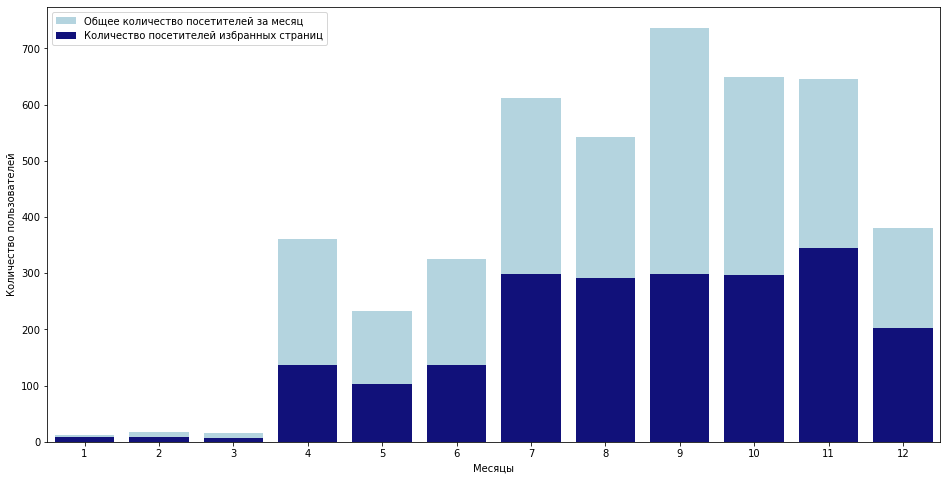

In [86]:
plt.figure(figsize=(16, 8))

bar1 = sns.barplot(x= 'month',  y="uid", data=data_mau, color='lightblue', label = 'Общее количество посетителей за месяц')
bar2 = sns.barplot(x= 'month',  y="uid", data=data_fav_mau, color='darkblue', label = 'Количество посетителей избранных страниц')
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')

#bar1.bar_label(bar1.containers[0], label_type='edge', padding=5)
    
plt.legend()
plt.show()

### Количество сессий по месяцам

In [13]:
data_sess = data_2022.groupby('month').agg({'event_id': 'nunique'}).reset_index()
data_fav_sess = data_2022.query('fav == True').groupby('month').agg({'event_id': 'nunique'}).reset_index()

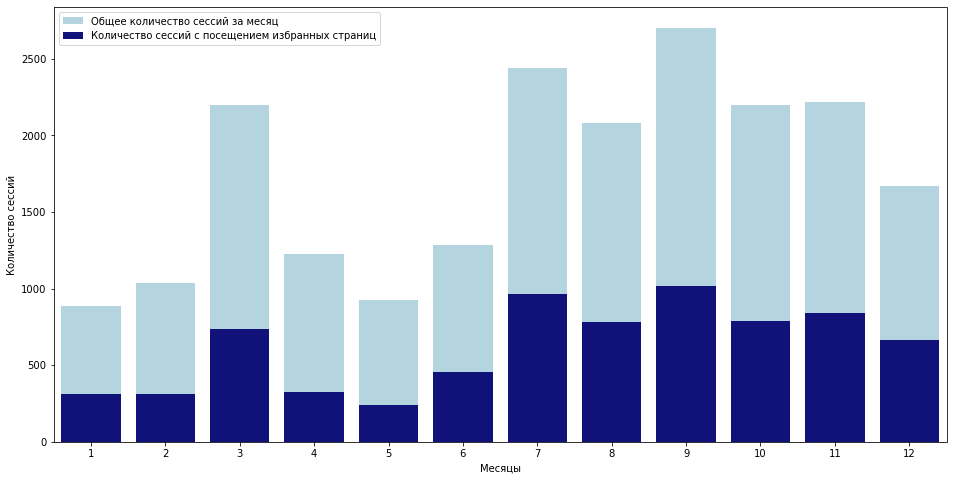

In [14]:
plt.figure(figsize=(16, 8))

bar1 = sns.barplot(x= 'month',  y="event_id", data=data_sess, color='lightblue', label = 'Общее количество сессий за месяц')
bar2 = sns.barplot(x= 'month',  y="event_id", data=data_fav_sess, color='darkblue', label = 'Количество сессий с посещением избранных страниц')
plt.xlabel('Месяцы')
plt.ylabel('Количество сессий')
plt.legend()

#bar1.bar_label(bar1.containers[0], label_type='edge', padding=5)

#for i in bar1.containers:
   # bar1.bar_label(i, padding=5)

plt.show()

### Самые популярные страницы и источники перехода

In [99]:
top_articles = list(data_2022['title_new'].value_counts().head(20).index)
top_articles

['Digital office / Офис',
 'Рассадка "Невская Ратуша"',
 'Запись на спортивные занятия Цифергауз',
 'Памятка руководителю / наставнику',
 'Офис "Цифергауз" на о. Новая Голландия',
 'Рассадка "Цифергауз"',
 'Сценарии пропускного режима',
 'Концепция распределения рабочих мест для ДЦТ и ДИР',
 'Среда здоровья',
 'Командная работа и встречи в Цифергауз (переговорные комнаты)',
 'Офис "Дом Инноваций" в Невской Ратуше',
 'Памятка новому сотруднику',
 'Общая информация Невская Ратуша',
 'Офис ИТ-кластера в Сириусе',
 'Спортивные занятия Цифергауз',
 'Незакрепленные рабочие места',
 'Распределение рабочих мест для ДЦТ, ДИР, ДЦИ',
 'Офисные сервисы Цифергауз',
 'Общая информация Цифергауз',
 'Календарь мероприятий']

In [18]:
data_transition = data_2022.groupby('transition').agg({'event_id':'nunique'}).sort_values(by = 'event_id', 
                                                                                          ascending = False).reset_index()
data_transition['percent'] = round(data_transition['event_id'] *100/ data_2022['event_id'].nunique(),2)
data_transition

,transition,event_id,percent
0,Confluence,15642,74.96
1,Прямой,4936,23.65
2,Корпоративный поиск,180,0.86
3,Jira,77,0.37
4,Лента,12,0.06
5,Портал IaaS,11,0.05
6,Прочее,10,0.05


In [81]:
data_top_articles = data_2022.query('title_new in @top_articles').pivot_table(index = 'title_new', 
                        columns = 'transition', values = 'event_id', aggfunc = 'nunique').fillna(0)
data_top_articles

transition,Confluence,Jira,Корпоративный поиск,Лента,Портал IaaS,Прочее,Прямой
title_new,,,,,,,
Digital office / Офис,1651.0,1.0,22.0,0.0,4.0,0.0,1057.0
Запись на спортивные занятия Цифергауз,327.0,0.0,2.0,0.0,0.0,0.0,437.0
Календарь мероприятий,119.0,1.0,1.0,0.0,0.0,0.0,160.0
Командная работа и встречи в Цифергауз (переговорные комнаты),315.0,0.0,1.0,0.0,0.0,0.0,153.0
Концепция распределения рабочих мест для ДЦТ и ДИР,379.0,2.0,0.0,4.0,0.0,0.0,103.0
Незакрепленные рабочие места,272.0,2.0,0.0,0.0,0.0,0.0,26.0
Общая информация Невская Ратуша,321.0,9.0,15.0,0.0,0.0,0.0,52.0
Общая информация Цифергауз,266.0,0.0,4.0,0.0,0.0,0.0,12.0
"Офис ""Дом Инноваций"" в Невской Ратуше",413.0,0.0,0.0,0.0,0.0,0.0,7.0


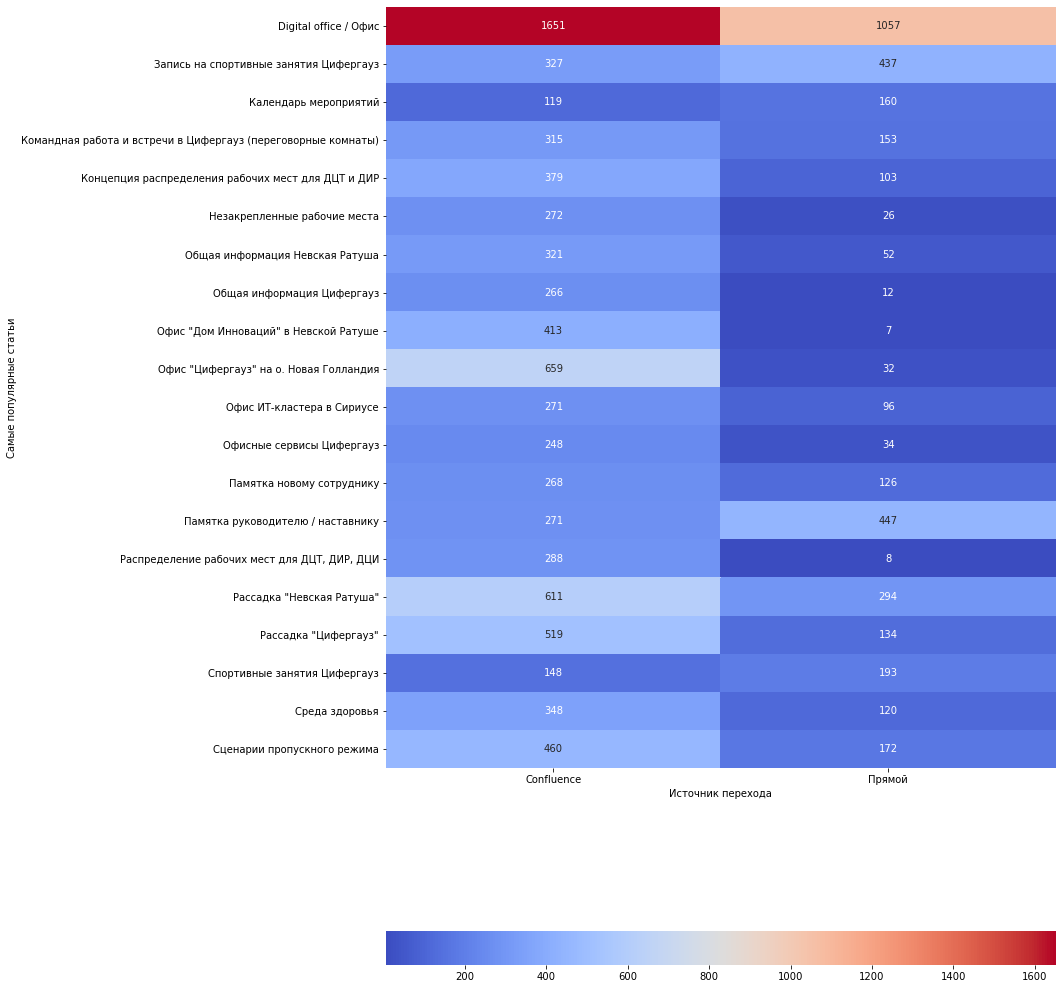

In [97]:
plt.figure(figsize = (12,20))
sns.heatmap(data_top_articles[['Confluence', 'Прямой']], cbar_kws= {'orientation': 'horizontal'}, cmap= 'coolwarm', 
            annot = True, fmt='.4g')
plt.xlabel('Источник перехода')
plt.ylabel('Самые популярные статьи')
plt.show()

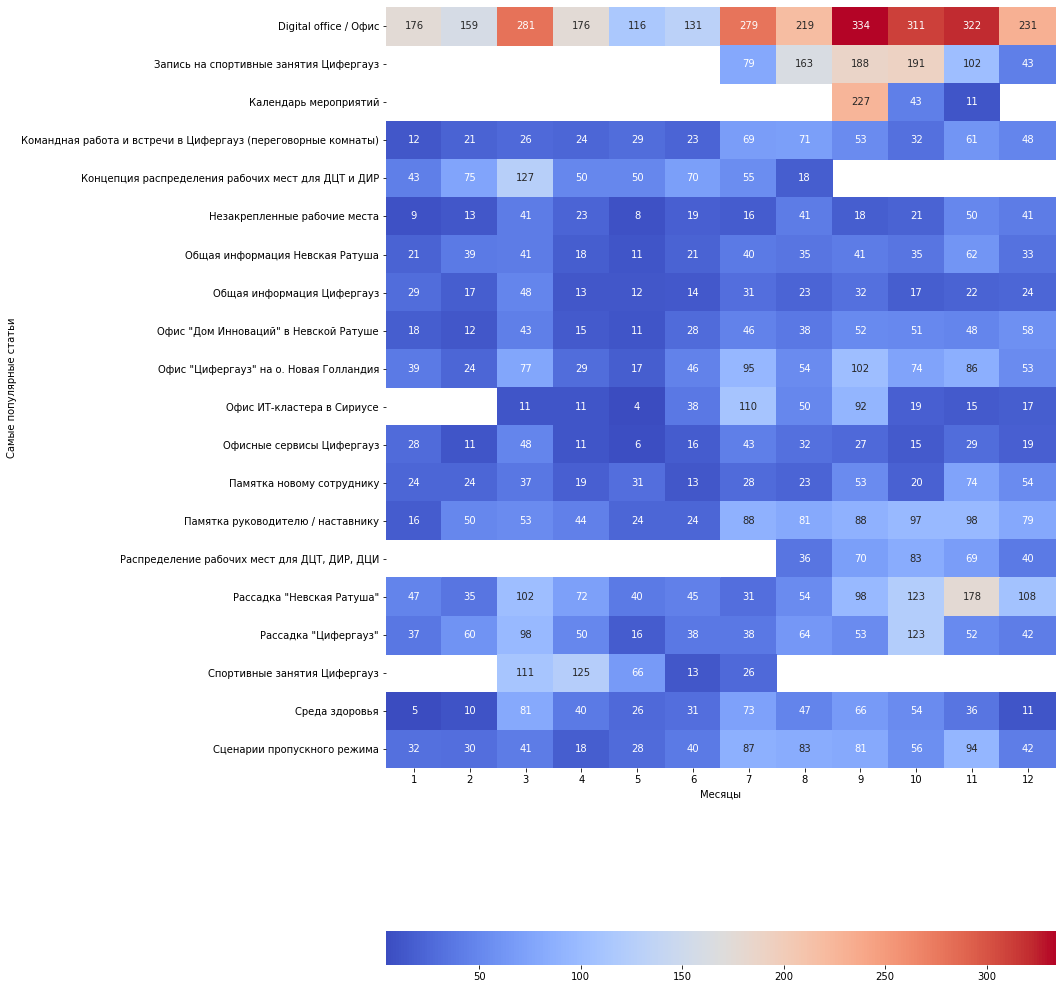

In [101]:
plt.figure(figsize = (12,20))
sns.heatmap(data_2022.query('title_new in @top_articles').pivot_table(index = 'title_new', columns = 'month', 
                             values = 'event_id', aggfunc = 'count'), cbar_kws= {'orientation': 'horizontal'}, 
                             cmap= 'coolwarm', annot = True, fmt='.4g')
plt.xlabel('Месяцы')
plt.ylabel('Самые популярные статьи')
plt.show()

### Распределение посещения избранных страниц по месяцам

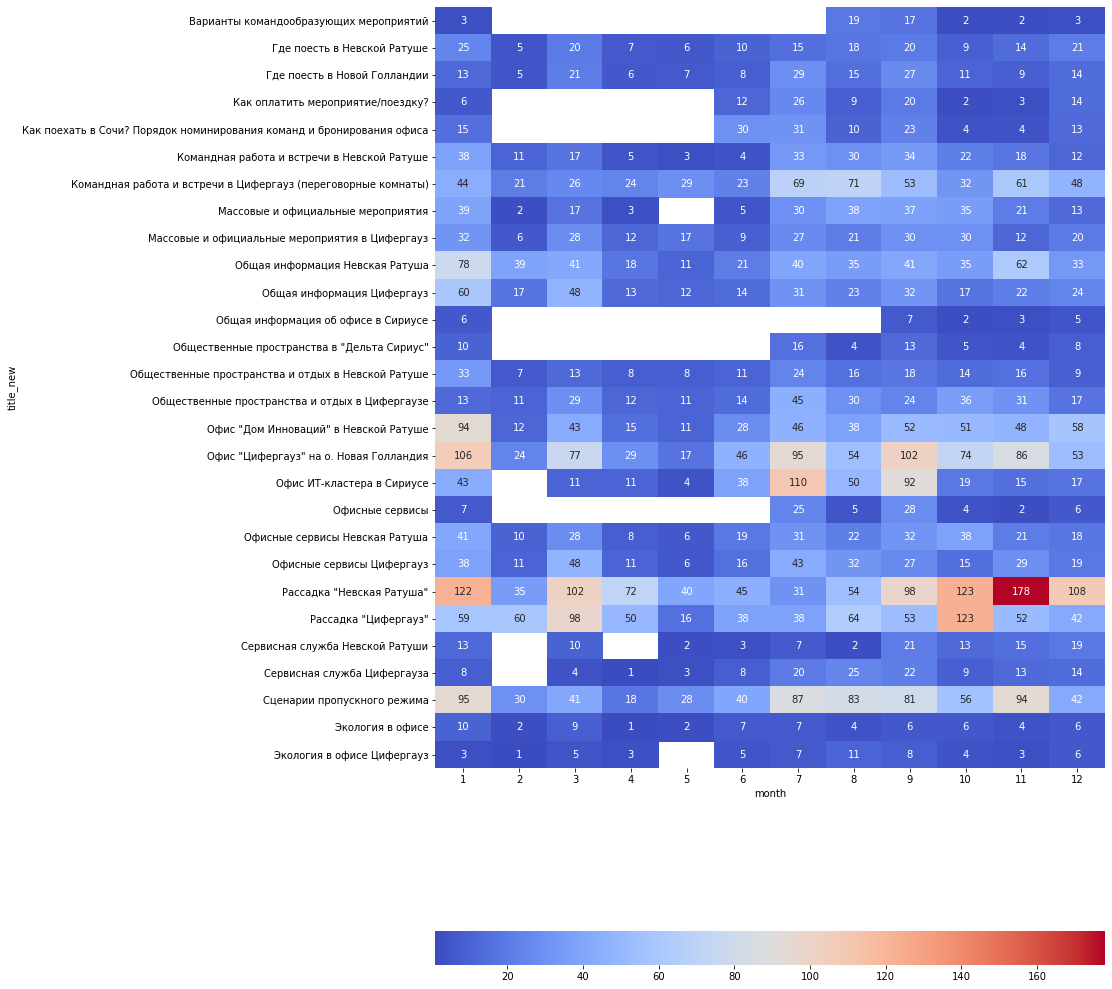

In [91]:
plt.figure(figsize = (12,20))
sns.heatmap(data_fav.pivot_table(index = 'title_new', columns = 'month', 
                             values = 'event_id', aggfunc = 'count'), cbar_kws= {'orientation': 'horizontal'}, 
                             cmap= 'coolwarm', annot = True, fmt='.4g')
plt.show()